In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is

In [3]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [4]:
yt.funcs.mylog.setLevel(50)

Before we try out values between $\xi$=6.451 and $\xi =6.470001$, it would be easier if we did the conversion of pressure directly inside the condinit.f90 file

In [5]:
cd /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin


# No gravity, Marginally stable case $\xi =6.470001$

In [15]:
rho

array([ 1.        ,  0.99998331,  0.99993331, ...,  0.00451437,
        0.00450925,  0.00450415])

In [30]:
rho = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")
rho_c = 0.02806
scale_d = 3.92e-18
idx = np.where(1/rho>14.1)[0][0]
print idx
print  rho[idx]
rho_min = rho[idx]*rho_c*scale_d
rho_min2 = rho[idx]*1.099952e-19
print rho_min==rho_min2
print rho_min

647
0.0706998795588
True
7.77664739205e-21


In [28]:
rho_c*scale_d

1.099952e-19

In [22]:
(k*T_in/mp)/scale_p 

3.2870596565353414e+17

In [26]:
(scale_p)*mp/k/T_out/scale_d

7.760797413856846e-07

In [27]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
P_out2 = rho_min*3.2870596565353414e+17
print P_out==P_out2
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
rho_out2 = P_out *7.760797413856846e-07
print rho_out ==rho_out2
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

True
Pressure at edge of cloud :  6.41613828028e-12 cgs
Pressure at edge of cloud:  0.00255623039055 code units
True
Denisty outside the cloud:  7.77664739205e-27 cgs
Denisty outside the cloud:  1.98383862042e-09 code units


Okay check that conversion program works as expected 


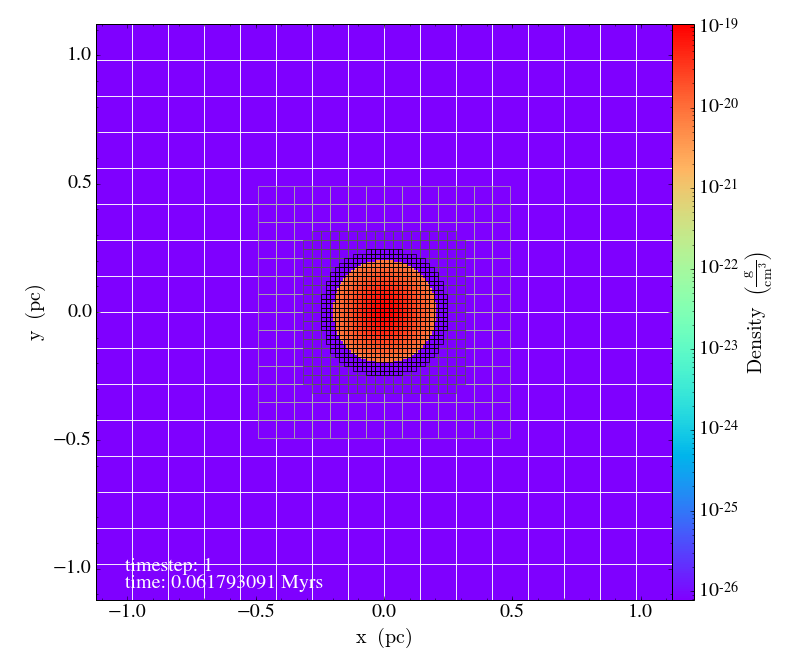


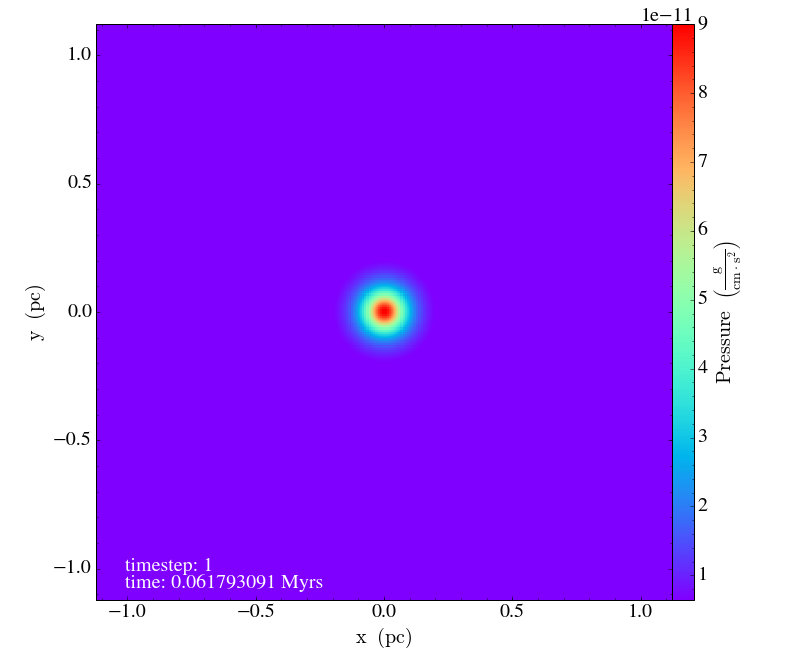


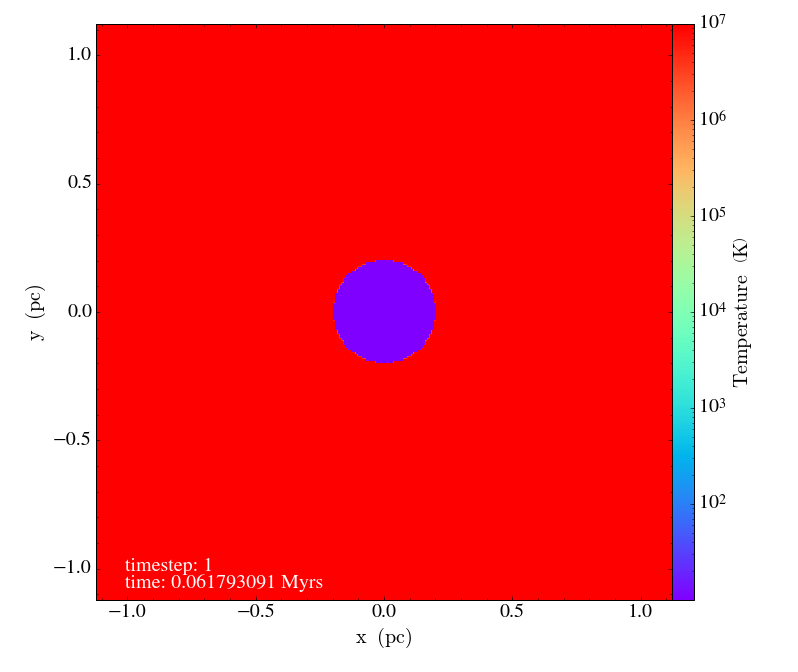

In [31]:
plot_is.plot_time_slice("density",1,grid=True)
plot_is.plot_time_slice("pressure",1,log=False)
plot_is.plot_time_slice("temperature",1)